In [4]:
pip install tensorflow

     ---------------------------------------- 455.9/455.9 MB 241.7 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 462.4 kB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 701.4 kB/s eta 0:00:00
     ---------------------------------------- 123.4/123.4 kB 516.5 kB/s eta 0:00:00
     ---------------------------------------- 438.7/438.7 kB 638.5 kB/s eta 0:00:00
     ---------------------------------------- 895.9/895.9 kB 623.2 kB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 628.9 kB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 196.6 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 161.6 kB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 587.7 kB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 302.8 kB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB 159.3 kB/s eta 0:00:00
     -----------

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers  # 모듈(변수나 함수를 포함)만 불러오기

# BMI 데이터를 읽어 들이고 정규화하기
df = pd.read_csv("bmi.csv")    

In [6]:
df

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat
...,...,...,...
19995,122,58,fat
19996,193,69,normal
19997,193,37,thin
19998,195,51,thin


In [7]:
# 몸무게와 키 데이터
df["weight"] /= 100   # normalization : 학습 속도를 높이기 위함
df["height"] /= 200   # normalization 
# X = df[["weight", "height"]].to_numpy()
X = df.iloc[:,0:2]

# 레이블링, 라벨링 (labelling) => one-hot encoding
bclass = {"thin":[1,0,0], "normal":[0,1,0], "fat":[0,0,1]}
y = np.empty((20000,3))     # 2000x3 크기의 다차원 벡터 생성
for i, v in enumerate(df["label"]):
    y[i] = bclass[v]        # "thin'이면, y[i]=[1,0,0] 와 같이 할당
    
# 훈련 전용 데이터와 테스트 전용 데이터로 나누기
X_train, y_train = X[0:15000], y[0:15000]
X_test,  y_test  = X[15000:20000], y[15000:20000]

In [8]:
# 모델 구조 정의하기
model = tf.keras.Sequential()         # 순차적 계층화 준비
model.add(layers.Dense(8, input_shape=(2,)))  # 입력 2개로부터 전달받는 8개 노드의 layer 생성
model.add(layers.Activation('relu'))  # ReLU 활성화함수 채택(hidden layer)
model.add(layers.Dropout(0.1))        # dropout ratio=10% (배치 훈련시 10% arc 무시)

model.add(layers.Dense(4))            # 4개 노드의 layer 생성
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(3))
model.add(layers.Activation('softmax'))# 분류(classification)을 위해 softmax 함수 사용

# 모델 구축하기
model.compile(
    loss='categorical_crossentropy',  # 다중 교차엔트로피
    optimizer="rmsprop",   # 최적화 기법 중 하나
    metrics=['accuracy'])  # 정확도 측정

In [9]:
# 데이터 훈련하기
hist = model.fit(
    X_train, y_train,
    batch_size=100,     # 100개에 한 번씩 업데이터 실행
    epochs=50,          # 전체 훈련 데이터셋을 총 50회 반복 실험. 단, 조기중지될 수 있음
    validation_split=0.2,  
        #validation data 분할 비율. 즉, 15000개 중에서 20%인 3000개를 validation용으로 분할
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)],  
        #'val_loss'를 monitor하여 감소하면 10번 더 참고 조기중지(early stopping)
    verbose=1)   # 전 과정을 화면에 출력(1) 또는 미출력(0) 모드

# 테스트 데이터로 평가하기
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Epoch 1/50
120/120 [==============================] - 2s 8ms/step - loss: 1.0889 - accuracy: 0.4507 - val_loss: 1.0703 - val_accuracy: 0.4767
Epoch 2/50
120/120 [==============================] - 0s 4ms/step - loss: 1.0638 - accuracy: 0.5438 - val_loss: 1.0436 - val_accuracy: 0.6700
Epoch 3/50
120/120 [==============================] - 0s 4ms/step - loss: 1.0350 - accuracy: 0.5690 - val_loss: 1.0077 - val_accuracy: 0.6813
Epoch 4/50
120/120 [==============================] - 0s 4ms/step - loss: 0.9990 - accuracy: 0.5752 - val_loss: 0.9610 - val_accuracy: 0.6847
Epoch 5/50
120/120 [==============================] - 0s 4ms/step - loss: 0.9575 - accuracy: 0.5782 - val_loss: 0.9069 - val_accuracy: 0.6847
Epoch 6/50
120/120 [==============================] - 0s 4ms/step - loss: 0.9071 - accuracy: 0.5871 - val_loss: 0.8512 - val_accuracy: 0.6907
Epoch 7/50
120/120 [==============================] - 0s 4ms/step - loss: 0.8565 - accuracy: 0.6097 - val_loss: 0.7860 - val_accuracy: 0.7587
Epoch 

In [10]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

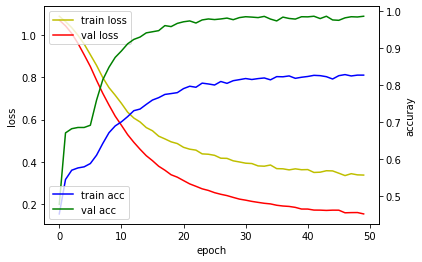

In [11]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 activation (Activation)     (None, 8)                 0         
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 activation_1 (Activation)   (None, 4)                 0         
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 3)                 1

In [13]:
model.get_weights()

[array([[-0.97981346,  0.12674117, -0.16146916,  1.3188218 ,  1.3830665 ,
         -0.6113999 , -0.43621683, -0.7335477 ],
        [ 1.2188624 , -0.63556707, -0.574932  , -0.82305735, -0.90356064,
         -0.4997696 , -0.21349764,  0.18297273]], dtype=float32),
 array([ 0.26655823,  0.        ,  0.        , -0.49032348, -0.49412104,
         0.        ,  0.        ,  0.        ], dtype=float32),
 array([[-2.4862938 , -0.08842543, -0.37413976,  3.2883646 ],
        [-0.3426979 ,  0.64820415, -0.5928807 ,  0.09688079],
        [-0.599777  , -0.5831965 ,  0.4545198 , -0.41380113],
        [-2.3362875 ,  4.7011576 , -0.6947124 , -1.8688979 ],
        [-2.5612009 ,  4.7393436 , -0.35377675, -1.8148828 ],
        [-0.69317806, -0.49982923,  0.59582204,  0.69022423],
        [-0.29321393, -0.40684184,  0.33546478, -0.32117584],
        [-0.63198626,  0.34607166, -0.6930702 , -0.5232501 ]],
       dtype=float32),
 array([0.29684442, 0.02624467, 0.        , 0.65238315], dtype=float32),
 array(

In [16]:
model.save("dnn_bmi.h5")
print("Saved model to disk.")

from numpy import loadtxt
from tensorflow.python.keras.models import load_model

# 저장된 모델 읽어오기
loaded_model = load_model("dnn_bmi.h5")
model.summary()

# 모델을 평가하기
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Saved model to disk.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 activation (Activation)     (None, 8)                 0         
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 activation_1 (Activation)   (None, 4)                 0         
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None,

In [17]:
# X_test 샘플들의 클래스 예측하기
y_prob = model.predict(X_test)    # X_test의 출력값 확인하기
print(y_prob)

y_class = y_prob.argmax(axis=-1)  # X_test의 클래스 예측하기
y_class

157/157 [==============================] - 1s 3ms/step
[[9.7192606e-05 1.4830294e-01 8.5159987e-01]
 [8.1984133e-01 1.8015875e-01 1.2483191e-08]
 [1.7709872e-02 9.8184180e-01 4.4830685e-04]
 ...
 [9.7905684e-01 2.0943180e-02 6.3318542e-18]
 [9.4846666e-01 5.1533341e-02 3.4508827e-14]
 [6.0853123e-04 6.1258829e-01 3.8680321e-01]]


array([2, 0, 1, ..., 0, 0, 1], dtype=int64)

In [18]:
# 새로운 샘플의 클래스 예측하기
X_new = [80, 175]
X_new[0]/=100; X_new[1]/=200
print(X_new)

y_prob = model.predict([X_new]) # X_new의 출력값 확인하기
y_pred = y_prob.argmax()        # X_new의 클래스 예측하기
print(y_prob, y_pred)

[0.8, 0.875]
1/1 [==============================] - 0s 196ms/step
[[3.9932533e-07 4.5995221e-02 9.5400435e-01]] 2


In [19]:
type(X_test)

pandas.core.frame.DataFrame

In [20]:
X_test.head()

,height,weight
15000,0.690,0.55
15001,0.760,0.36
15002,0.915,0.72
15003,0.990,0.51
15004,0.745,0.47


In [21]:
X_test.head(5).index.tolist()

[15000, 15001, 15002, 15003, 15004]

In [22]:
X_test0 = X_test.loc[15000]
print(X_test0); print()

X_test_li = list(X_test0)
y_prob = model.predict([X_test_li])  # model.predict([[0.69, 0.55]])
y_pred = y_prob.argmax()
print(y_prob, y_pred)

height    0.69
weight    0.55
Name: 15000, dtype: float64

1/1 [==============================] - 0s 89ms/step
[[9.7192606e-05 1.4830296e-01 8.5159987e-01]] 2


In [23]:
def predict_bmi(X_new):
  y_prob = model.predict([X_new])
  y_pred = y_prob.argmax()
  print(X_new, y_prob, y_pred, sep='\t')

In [24]:
X_mean = [X_train["height"].mean(), X_train["weight"].mean()]
X_min = [X_train["height"].min(), X_train["weight"].min()]
X_max = [X_train["height"].max(), X_train["weight"].max()]
X_min_max = [X_train["height"].min(), X_train["weight"].max()]
X_max_min = [X_train["height"].max(), X_train["weight"].min()]

predict_bmi(X_mean)
predict_bmi(X_min)
predict_bmi(X_max)
predict_bmi(X_min_max)
predict_bmi(X_max_min)

1/1 [==============================] - 0s 90ms/step
[0.7999703333333329, 0.5757626666666672]	[[0.02073429 0.9758128  0.00345293]]	1
1/1 [==============================] - 0s 87ms/step
[0.6, 0.35]	[[0.00583258 0.5656776  0.4284898 ]]	1
1/1 [==============================] - 0s 102ms/step
[1.0, 0.8]	[[4.4618670e-02 9.5536739e-01 1.4052079e-05]]	1
1/1 [==============================] - 0s 112ms/step
[0.6, 0.8]	[[5.3689497e-08 2.9626384e-02 9.7037357e-01]]	2
1/1 [==============================] - 0s 90ms/step
[1.0, 0.35]	[[9.8793387e-01 1.2066102e-02 3.5541237e-20]]	0
